In [14]:
from selfsupmotion.data.tao.data_module import TAODataModule

In [15]:
from glob import glob
from natsort import natsorted
import torch.nn.functional as F 

In [16]:
images = natsorted(glob("/home/raphael/datasets/tao_objects/*.jpg"))
len(images)

106568

In [17]:
import os
os.path.basename(images[2])

'train-ArgoVerse-0ef28d5c-ae34-370b-99e7-6709e1c4b929-15984_1.jpg'

In [18]:
images[0].split("-")

['/home/raphael/datasets/tao_objects/train',
 'ArgoVerse',
 '0ef28d5c',
 'ae34',
 '370b',
 '99e7',
 '6709e1c4b929',
 '15983_0.jpg']

In [19]:
"-".join(images[0].split("-")[2:-1])

'0ef28d5c-ae34-370b-99e7-6709e1c4b929'

In [20]:
val_images = []
val_dataset = []
val_sequence_id = []
val_track_id = []
val_frame_id = []
val_seq_id = []
datasets = {}
for image in images:
    if "val" in image:
        val_images.append(image)
        meta = image.split("-")
        val_dataset.append(meta[1])
        tid_fid = meta[-1]
        tid, fid = tid_fid.split("_")
        tid, fid = int(tid), int(fid.replace(".jpg",""))
        seq_id = "-".join(meta[2:-1])
        val_track_id.append(tid)
        val_frame_id.append(fid)
        val_seq_id.append(seq_id)
        
        
len(val_images), val_images[30],val_images[-1] 

(72694,
 '/home/raphael/datasets/tao_objects/val-ArgoVerse-00c561b9-2057-358d-82c6-5b06d76cebcf-15555_0.jpg',
 '/home/raphael/datasets/tao_objects/val-YFCC100M-v_fd9dd7b1555153519122c09f1312a1b2-7595_36.jpg')

In [21]:
import pandas as pd
df = pd.DataFrame()
df["val_images"] = val_images
df

,val_images
0,/home/raphael/datasets/tao_objects/val-ArgoVer...
1,/home/raphael/datasets/tao_objects/val-ArgoVer...
2,/home/raphael/datasets/tao_objects/val-ArgoVer...
3,/home/raphael/datasets/tao_objects/val-ArgoVer...
4,/home/raphael/datasets/tao_objects/val-ArgoVer...
...,...
72689,/home/raphael/datasets/tao_objects/val-YFCC100...
72690,/home/raphael/datasets/tao_objects/val-YFCC100...
72691,/home/raphael/datasets/tao_objects/val-YFCC100...
72692,/home/raphael/datasets/tao_objects/val-YFCC100...


In [22]:
df["dataset"] = val_dataset
df["track_id"] = val_track_id
df["frame_id"] = val_frame_id
df["seq_id"] = val_seq_id
df[df["seq_id"] == "9da4ca63-f524-3b38-8c8b-624f17518574"]

,val_images,dataset,track_id,frame_id,seq_id
424,/home/raphael/datasets/tao_objects/val-ArgoVer...,ArgoVerse,16071,0,9da4ca63-f524-3b38-8c8b-624f17518574
425,/home/raphael/datasets/tao_objects/val-ArgoVer...,ArgoVerse,16071,1,9da4ca63-f524-3b38-8c8b-624f17518574
426,/home/raphael/datasets/tao_objects/val-ArgoVer...,ArgoVerse,16072,0,9da4ca63-f524-3b38-8c8b-624f17518574
427,/home/raphael/datasets/tao_objects/val-ArgoVer...,ArgoVerse,16072,1,9da4ca63-f524-3b38-8c8b-624f17518574
428,/home/raphael/datasets/tao_objects/val-ArgoVer...,ArgoVerse,16072,2,9da4ca63-f524-3b38-8c8b-624f17518574
...,...,...,...,...,...
509,/home/raphael/datasets/tao_objects/val-ArgoVer...,ArgoVerse,16079,24,9da4ca63-f524-3b38-8c8b-624f17518574
510,/home/raphael/datasets/tao_objects/val-ArgoVer...,ArgoVerse,16079,25,9da4ca63-f524-3b38-8c8b-624f17518574
511,/home/raphael/datasets/tao_objects/val-ArgoVer...,ArgoVerse,16079,26,9da4ca63-f524-3b38-8c8b-624f17518574
512,/home/raphael/datasets/tao_objects/val-ArgoVer...,ArgoVerse,16079,27,9da4ca63-f524-3b38-8c8b-624f17518574


In [23]:
#embeddings=embeddings[0:72694]

In [24]:
embeddings[df["seq_id"] == "9da4ca63-f524-3b38-8c8b-624f17518574"]

NameError: name 'embeddings' is not defined

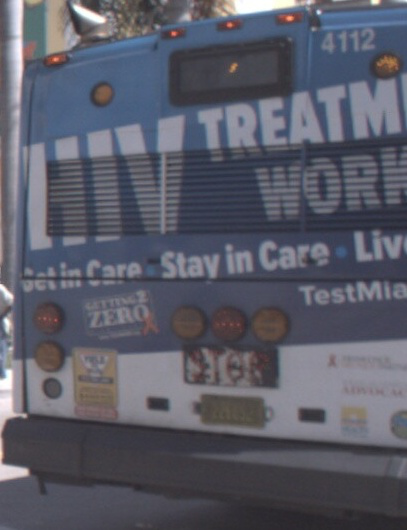

In [25]:
from PIL import Image
Image.open(df["val_images"].iloc[453])

In [26]:
import torchvision.models as models
import torch
resnet50 = models.resnet50(pretrained=True)
resnet50 = torch.nn.Sequential(*(list(resnet50.children())[:-1]))

In [27]:
from PIL import Image

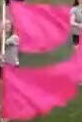

In [28]:
image_name = images[72614]
image = Image.open(image_name)
image

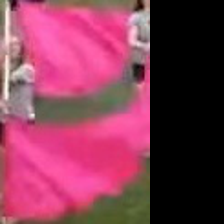

In [29]:
def fit_image(image):
    canvas = Image.new('RGB', (224, 224))
    if image.width < image.height:
        target_height = 224
        target_width = (image.width/image.height) * 224
    elif image.width > image.height:
        target_width = 224
        target_height = (image.height/image.width) * 224
    else:
        target_width = 224
        target_height = 224
    target_height=max(16, target_height)
    target_width=max(16, target_width)
    
    target_width, target_height = int(target_width), int(target_height)
    resized = image.resize((target_width,target_height))
    canvas.paste(resized)
    return canvas
fit_image(image)

In [30]:
from torchvision.transforms import ToTensor, Normalize, Compose
transforms = Compose([ToTensor(),
    Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
    ]
)

In [31]:
x = transforms(image)
x = x.unsqueeze(dim=0)
x

tensor([[[[-0.0287,  0.0056,  0.1254,  ...,  0.7591,  1.0844,  0.9646],
          [-0.0458,  0.2111,  0.3481,  ...,  0.6049,  1.0502,  0.9474],
          [ 0.1939,  0.2967,  0.5022,  ...,  0.6563,  0.9474,  0.8276],
          ...,
          [ 0.4679,  0.9132,  1.2899,  ..., -0.7993, -0.8335, -0.7993],
          [ 0.2111,  0.7248,  1.0502,  ..., -0.8164, -0.8335, -0.8507],
          [-0.1828,  0.3823,  0.8618,  ..., -0.7822, -0.7822, -0.7993]],

         [[ 0.2052,  0.2227,  0.3277,  ...,  0.4328,  0.5203,  0.3978],
          [ 0.1001,  0.3627,  0.4503,  ...,  0.2227,  0.5028,  0.3978],
          [ 0.2577,  0.3627,  0.5378,  ...,  0.2052,  0.4678,  0.3452],
          ...,
          [-0.0749,  0.2227,  0.4328,  ..., -0.4951, -0.5301, -0.4951],
          [-0.0574,  0.3452,  0.5378,  ..., -0.5126, -0.5301, -0.5476],
          [-0.3901,  0.1176,  0.4853,  ..., -0.4776, -0.4776, -0.4951]],

         [[-0.1661, -0.1138,  0.0779,  ...,  0.4614,  0.6356,  0.5136],
          [-0.2358,  0.0431,  

In [32]:
resnet50 = resnet50.cuda()
embedding = resnet50(x.cuda()).squeeze().cpu().detach().numpy()
embedding

array([0.30303335, 0.54862505, 0.490458  , ..., 0.3675896 , 0.47076416,
       0.36630392], dtype=float32)

In [33]:
import numpy as np
embeddings = np.zeros((len(val_images), 2048))
f"{embeddings.size/1024/1024/1024} gigabytes"

'0.13865280151367188 gigabytes'

In [34]:
from tqdm import tqdm
resnet50.cuda()
for i, image_name in enumerate(tqdm(df["val_images"])):
    #print(image_name)
    #if i>50:
    #    break
    image = Image.open(image_name)
    #if (image.width < 1) or (image.height < 1):
    #    #print (".")
    #    continue
    image_224 = fit_image(image)
    x = transforms(image_224).unsqueeze(dim=0).cuda()
    embedding = F.normalize(resnet50(x), p=2, dim=1).squeeze().cpu().detach().numpy()
    #x = F.normalize(x, dim=1) # Normalize
    embeddings[i] = embedding
    
    
    

100%|██████████| 72694/72694 [11:44<00:00, 103.14it/s]


In [36]:
embeddings[72613]

array([0.01595564, 0.02603134, 0.02291193, ..., 0.01501644, 0.0211797 ,
       0.01708269])

In [37]:
seq_ids = df["seq_id"].unique()
len(seq_ids)

655

In [38]:
seq_id = seq_ids[100]
seq_id

'b2ed13f9-01b4dd4f'

In [39]:
sequence_df = df[df["seq_id"]==seq_id]
sequence_df

,val_images,dataset,track_id,frame_id,seq_id
5563,/home/raphael/datasets/tao_objects/val-BDD-b2e...,BDD,5911,0,b2ed13f9-01b4dd4f
5564,/home/raphael/datasets/tao_objects/val-BDD-b2e...,BDD,5911,1,b2ed13f9-01b4dd4f
5565,/home/raphael/datasets/tao_objects/val-BDD-b2e...,BDD,5911,2,b2ed13f9-01b4dd4f
5566,/home/raphael/datasets/tao_objects/val-BDD-b2e...,BDD,5911,3,b2ed13f9-01b4dd4f
5567,/home/raphael/datasets/tao_objects/val-BDD-b2e...,BDD,5911,4,b2ed13f9-01b4dd4f
...,...,...,...,...,...
5756,/home/raphael/datasets/tao_objects/val-BDD-b2e...,BDD,5920,35,b2ed13f9-01b4dd4f
5757,/home/raphael/datasets/tao_objects/val-BDD-b2e...,BDD,5920,36,b2ed13f9-01b4dd4f
5758,/home/raphael/datasets/tao_objects/val-BDD-b2e...,BDD,5920,37,b2ed13f9-01b4dd4f
5759,/home/raphael/datasets/tao_objects/val-BDD-b2e...,BDD,5920,38,b2ed13f9-01b4dd4f


In [40]:
frames = sequence_df["frame_id"].unique()
frames

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 32, 33, 34, 35, 36, 37,
       38, 39, 28, 29, 30, 31])

In [41]:
sequence_df[sequence_df["frame_id"]==1]

,val_images,dataset,track_id,frame_id,seq_id
5564,/home/raphael/datasets/tao_objects/val-BDD-b2e...,BDD,5911,1,b2ed13f9-01b4dd4f
5600,/home/raphael/datasets/tao_objects/val-BDD-b2e...,BDD,5912,1,b2ed13f9-01b4dd4f
5625,/home/raphael/datasets/tao_objects/val-BDD-b2e...,BDD,5913,1,b2ed13f9-01b4dd4f
5654,/home/raphael/datasets/tao_objects/val-BDD-b2e...,BDD,5914,1,b2ed13f9-01b4dd4f
5658,/home/raphael/datasets/tao_objects/val-BDD-b2e...,BDD,5915,1,b2ed13f9-01b4dd4f
5669,/home/raphael/datasets/tao_objects/val-BDD-b2e...,BDD,5916,1,b2ed13f9-01b4dd4f


In [42]:
frame_df = sequence_df[sequence_df["frame_id"]==1]
frame_df[frame_df["track_id"]==7587].index[0]

IndexError: index 0 is out of bounds for axis 0 with size 0

In [43]:
frame_df[frame_df["track_id"]==1234].index

Int64Index([], dtype='int64')

In [44]:
sequence_df[sequence_df["frame_id"]==0].index

Int64Index([5563, 5599, 5624, 5653, 5657, 5668], dtype='int64')

In [45]:
(sequence_df[sequence_df["frame_id"]==0]["track_id"]==7587).index

Int64Index([5563, 5599, 5624, 5653, 5657, 5668], dtype='int64')

In [46]:
best = 0
match = {}
oracle = {}
for frame_id in frames:
    if frame_id==0:
        continue
    for i in sequence_df[sequence_df["frame_id"]==frame_id-1].index:
        match[i] = -1
        oracle[i] = -1
        best = 0
        track_id = val_track_id[i]
        frame_df = sequence_df[sequence_df["frame_id"]==frame_id]
        if len(frame_df[frame_df["track_id"]==track_id].index)==1:
            oracle[i]=frame_df[frame_df["track_id"]==track_id].index[0]

        for j in sequence_df[sequence_df["frame_id"]==frame_id].index:
            score = np.dot(embeddings[i], embeddings[j].T)
            if score>best:
                match[i] = j
                best= score
    #embeddings[]
track_id 

5920

In [47]:
from tqdm import tqdm
for seq_id in tqdm(seq_ids):
    sequence_df = df[df["seq_id"]==seq_id]
    frames = sequence_df["frame_id"].unique()
    for frame_id in frames:
        if frame_id==0:
            continue
        for i in sequence_df[sequence_df["frame_id"]==frame_id-1].index:
            match[i] = -1
            best = 0
            oracle[i] = -1
            track_id = val_track_id[i]
            frame_df = sequence_df[sequence_df["frame_id"]==frame_id]
            if len(frame_df[frame_df["track_id"]==track_id].index)==1:
                oracle[i]=frame_df[frame_df["track_id"]==track_id].index[0]
            for j in sequence_df[sequence_df["frame_id"]==frame_id].index:
                score = np.dot(embeddings[i], embeddings[j].T)
                if score>best:
                    match[i] = j
                    best= score

100%|██████████| 655/655 [01:21<00:00,  8.06it/s]


In [51]:
good = 0
bad = 0
for key in match:
    if val_track_id[key] == val_track_id[match[key]]:
        good+=1
    else:
        bad+=1
good, bad, good/bad  

(55688, 15115, 3.6842871319880914)

In [52]:
val_track_id[-1]

7595

In [53]:
good = 0
bad = 0
for key in oracle:
    if val_track_id[key] == val_track_id[oracle[key]]:
        good+=1
    else:
        bad+=1
good, bad, good/bad  

(67090, 3713, 18.068946943172637)

In [54]:
embeddings[72614]

array([0.01650654, 0.02656871, 0.02196281, ..., 0.01651335, 0.02061963,
       0.01617278])

In [98]:
oracle

{72581: 72582,
 72597: 72598,
 72582: 72583,
 72598: 72599,
 72583: 72584,
 72599: 72600,
 72584: 72585,
 72600: -1,
 72585: 72586,
 72586: 72587,
 72612: 72613,
 72587: 72588,
 72613: 72614,
 72620: 72621,
 72588: 72589,
 72614: 72615,
 72621: 72622,
 72589: 72590,
 72615: 72616,
 72622: 72623,
 72638: 72639,
 72590: 72591,
 72616: 72617,
 72623: 72624,
 72639: 72640,
 72591: 72592,
 72617: 72618,
 72624: 72625,
 72640: 72641,
 72592: 72593,
 72601: 72602,
 72618: 72619,
 72625: 72626,
 72641: 72642,
 72593: 72594,
 72602: 72603,
 72619: -1,
 72626: 72627,
 72642: 72643,
 72594: 72595,
 72603: 72604,
 72627: 72628,
 72643: 72644,
 72595: 72596,
 72604: 72605,
 72628: 72629,
 72644: 72645,
 72652: -1,
 72596: -1,
 72605: 72606,
 72629: 72630,
 72645: 72646,
 72606: 72607,
 72630: 72631,
 72646: 72647,
 72653: -1,
 72654: 72655,
 72607: 72608,
 72631: 72632,
 72647: 72648,
 72655: 72656,
 72608: 72609,
 72632: 72633,
 72648: 72649,
 72656: 72657,
 72662: 72663,
 72609: 72610,
 72633: 72

In [99]:
match

{72581: 72582,
 72597: 72598,
 72582: 72583,
 72598: 72583,
 72583: 72584,
 72599: -1,
 72584: 72585,
 72600: -1,
 72585: 72586,
 72586: 72587,
 72612: 72620,
 72587: 72588,
 72613: -1,
 72620: 72621,
 72588: 72589,
 72614: -1,
 72621: 72622,
 72589: 72590,
 72615: -1,
 72622: 72623,
 72638: -1,
 72590: 72591,
 72616: -1,
 72623: 72624,
 72639: -1,
 72591: 72592,
 72617: 72618,
 72624: 72625,
 72640: -1,
 72592: 72593,
 72601: 72602,
 72618: 72619,
 72625: 72626,
 72641: 72619,
 72593: 72594,
 72602: 72603,
 72619: 72594,
 72626: 72627,
 72642: -1,
 72594: 72595,
 72603: 72604,
 72627: 72628,
 72643: -1,
 72595: 72605,
 72604: 72605,
 72628: 72629,
 72644: -1,
 72652: -1,
 72596: -1,
 72605: 72654,
 72629: 72630,
 72645: -1,
 72606: 72607,
 72630: 72631,
 72646: -1,
 72653: -1,
 72654: 72655,
 72607: 72608,
 72631: 72632,
 72647: -1,
 72655: 72656,
 72608: 72609,
 72632: 72633,
 72648: -1,
 72656: 72657,
 72662: 72657,
 72609: 72610,
 72633: 72634,
 72649: 72658,
 72657: 72658,
 72663:

In [61]:
df.iloc[5599]

val_images    /home/raphael/datasets/tao_objects/val-BDD-b2e...
dataset                                                     BDD
track_id                                                   5912
frame_id                                                      0
seq_id                                        b2ed13f9-01b4dd4f
Name: 5599, dtype: object

In [62]:
df.iloc[5600]

val_images    /home/raphael/datasets/tao_objects/val-BDD-b2e...
dataset                                                     BDD
track_id                                                   5912
frame_id                                                      1
seq_id                                        b2ed13f9-01b4dd4f
Name: 5600, dtype: object

In [55]:
embeddings[j]

array([0., 0., 0., ..., 0., 0., 0.])

In [45]:
sequence_df["frame_id"]==0

5563     True
5564    False
5565    False
5566    False
5567    False
        ...  
5756    False
5757    False
5758    False
5759    False
5760    False
Name: frame_id, Length: 198, dtype: bool

In [42]:
embeddings[5564]

array([0.01601165, 0.02577399, 0.02139773, ..., 0.01642025, 0.02051527,
       0.01674953])

In [42]:
embeddings[22]

array([0.01505388, 0.02526944, 0.0236951 , ..., 0.01399083, 0.02309921,
       0.01493018])

In [47]:
np.dot(embeddings[50],embeddings[20].T)

0.9960991060806498

In [48]:
np.dot(embeddings[50],embeddings[50].T)

0.9999999963529014

In [50]:
np.dot(embeddings[49],embeddings[50].T)

0.9956149238817847

In [61]:
np.save("val_embeddings.npy", embeddings)

In [1]:
import numpy as np
embeddings = np.load("val_embeddings.npy")

In [2]:
#similarity_matrix = np.dot(embeddings[0:72694],embeddings[0:72694].T)

In [3]:
similarity_matrix.mean()

0.9011300655631518

In [25]:
#similarity_matrix_crop=similarity_matrix[0:1000,0:1000]

In [26]:
#similarity_matrix_crop

array([[1.00000006, 0.9965002 , 0.99671759, ..., 0.99590398, 0.99608483,
        0.9961998 ],
       [0.9965002 , 0.99999999, 0.99665236, ..., 0.99554956, 0.99601463,
        0.99584481],
       [0.99671759, 0.99665236, 1.00000001, ..., 0.99560173, 0.99602651,
        0.99587719],
       ...,
       [0.99590398, 0.99554956, 0.99560173, ..., 0.99999993, 0.99575067,
        0.99580883],
       [0.99608483, 0.99601463, 0.99602651, ..., 0.99575067, 1.00000008,
        0.99618636],
       [0.9961998 , 0.99584481, 0.99587719, ..., 0.99580883, 0.99618636,
        1.        ]])

In [7]:
import cv2
img = cv2.applyColorMap((similarity_matrix_crop*255).astype(np.uint8), cv2.COLORMAP_JET)

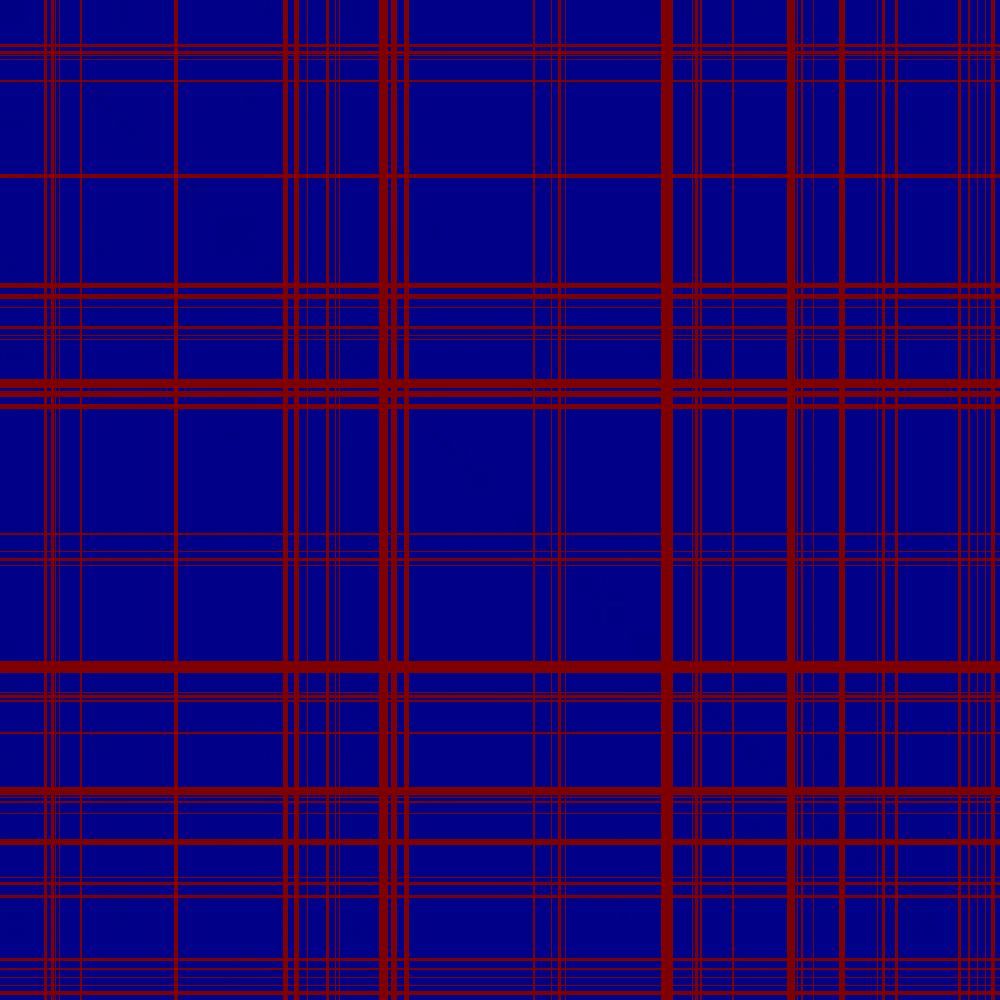

In [13]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
Image.fromarray(img)

In [70]:
F.normalize(resnet50(x), dim=1)

tensor([[[[0.0183]],

         [[0.0256]],

         [[0.0228]],

         ...,

         [[0.0163]],

         [[0.0219]],

         [[0.0154]]]], device='cuda:0', grad_fn=<DivBackward0>)